## Lib imports

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random
import statistics
# from math import pi
# from matplotlib.gridspec import GridSpec
# from dateutil.relativedelta import *
# import matplotlib.dates as mdates
# from matplotlib.dates import DateFormatter
import seaborn as sns
import scipy.stats
# from statsmodels.graphics.gofplots import qqplot
# import cv2
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import cross_val_score, cross_val_predict, RepeatedKFold 
from sklearn.linear_model import LinearRegression, LogisticRegression
# from collections import Counter
import copy
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import sklearn.metrics as me
# from sklearn import linear_model
from sklearn.metrics import classification_report
import pingouin as pg
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Files reading

In [40]:
!python3 '/Users/leosilva/development/thesis/workspacePyCharm/TwitterDataMining/main_generate_json_files.py' --all_tweets True

Starting script...
Removing existing file...
Ending script...


In [41]:
data = pd.read_json(r'/Users/leosilva/development/thesis/workspacePyCharm/TwitterDataMining/alldata.json')
data.head()

,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
id_str_twitter,23781146,15148309,927028057763995648,77648005,3429765093,10794662,1034514325644431361,529445600,12050562,62314491,18289937,172880784,18609547,2164986296,1026783544457273345,109604376,1040939562774790144,69734383,119897261
participant_id,1,2,3,None,4,5,6,None,7,8,None,9,10,11,12,13,14,15,16
name,Fe Rebelatto,Sommelier de Airbnb,✪ Felippe,Conference Distinguished Specialist,Paula Santana,Maharaja of the Legacies,Jessica,"var nickname = ""Riquettinha"";",Roberta Arcoverde,Gabriela,Thamara Andrade,felipe.ts ⚡,Juan Lopes,Rafael Dantas,iagor com i,T̷o̷m̷o̷y̷o̷ ̷ F̷u̷r̷a̷c̷ã̷o̷,Esdras Xavier,belle-🏴.dev || twitch.tv/bellesamways,Willian Justen
screen_name,rebelatto,Guilh_rm_,FelippeRegazio,NannoKa,psanrosa13,rponte,dev_jessi,Riquettinha,rla4,Gabrielathalita,thamyk,felipefialho_,juanplopes,RaffaelDantass,Iagor51,RafaelMansilha,esdras_xavieer,bellesamways,Willian_justen
location,"Rio de Janeiro, Brasil",somewhere in Brazil,,Ctba-PR Brasil,Brasil,"Ceará, Brazil",São Paulo - Brasil,"Belo Horizonte, Brasil","Sao Paulo, Brazil",Belo Horizonte,"Belo Horizonte, Brazil.",Dark Side of the Moon,"Rio de Janeiro, Brasil","São Paulo, Brasil",Pvh,"Palmas, Tocantins, Brasil","Jaraguá do Sul, Brasil",Curitiba,"Petrópolis, Brasil"


In [42]:
def create_tweets_df_per_user(data, id_user):

    tweets_pd = pd.DataFrame(data[id_user]['tweets'])
    tweets_pd.columns = ['id', 'id_str_twitter', "text", "created_at", 'favorite_count', 'retweet_count',
                         'lang',
                         "id_user", "vader_sentiment_analysis_score", "vader_sentiment_analysis_polarity",
                         "vader_sentiment_analysis_polarity_5_cat",
                         "oplexicon_sentiment_analysis_score", "oplexicon_sentiment_analysis_polarity",
                         "oplexicon_sentiment_analysis_polarity_5_cat",
                         "sentistrength_sentiment_analysis_score", "sentistrength_sentiment_analysis_polarity",
                         "sentistrength_sentiment_analysis_polarity_5_cat",
                         "sentilexpt_sentiment_analysis_score", "sentilexpt_sentiment_analysis_polarity",
                         "sentilexpt_sentiment_analysis_polarity_5_cat",
                         "liwc_sentiment_analysis_score", "liwc_sentiment_analysis_polarity",
                         "liwc_sentiment_analysis_polarity_5_cat",
                         "final_score", "final_score_ensemble", 
                         "final_polarity", "final_polarity_ensemble", 
                         'text_updated', 'is_retweet', 'retweet_updated']
 
    return tweets_pd

In [43]:
all_tweets = pd.DataFrame()
for c in data:
    id_user = c
    if data[id_user]['bigfive']:
        tweets = create_tweets_df_per_user(data, id_user)
        columns_to_delete = ['id', 'id_str_twitter', "text", 'favorite_count', 'retweet_count', 'lang',
                             #"vader_sentiment_analysis_score", 
                             "vader_sentiment_analysis_polarity",
                             "vader_sentiment_analysis_polarity_5_cat",
                             #"oplexicon_sentiment_analysis_score",
                             "oplexicon_sentiment_analysis_polarity",
                             "oplexicon_sentiment_analysis_polarity_5_cat",
                             #"sentistrength_sentiment_analysis_score",
                             "sentistrength_sentiment_analysis_polarity",
                             "sentistrength_sentiment_analysis_polarity_5_cat",
                             #"sentilexpt_sentiment_analysis_score",
                             "sentilexpt_sentiment_analysis_polarity",
                             "sentilexpt_sentiment_analysis_polarity_5_cat",
                             #"liwc_sentiment_analysis_score",
                             "liwc_sentiment_analysis_polarity",
                             "liwc_sentiment_analysis_polarity_5_cat",
                             'text_updated', 'is_retweet', 'retweet_updated']

        for c in columns_to_delete:
            del tweets[c]

        tweets['Participant'] = data[id_user]['participant_id']
        if all_tweets.empty:
            all_tweets = tweets
        else:
            all_tweets = all_tweets.append(tweets)

In [44]:
all_tweets.head()

,created_at,id_user,vader_sentiment_analysis_score,oplexicon_sentiment_analysis_score,sentistrength_sentiment_analysis_score,sentilexpt_sentiment_analysis_score,liwc_sentiment_analysis_score,final_score,final_score_ensemble,final_polarity,final_polarity_ensemble,Participant
0,2021-03-31T19:13:28,26,-0.4588,0.000000,0.00,0.00,0.0000,-0.091760,0.000,neg,neu,1
1,2021-03-31T12:28:56,26,0.0000,0.000000,0.00,0.00,-0.0667,-0.013340,0.000,neg,neu,1
2,2021-03-31T12:17:06,26,0.7734,0.458831,0.00,0.00,0.0196,0.250366,0.000,pos,neu,1
3,2021-03-31T11:46:04,26,-0.8720,0.458831,0.25,-0.25,0.0400,-0.074634,0.000,neg,neu,1
4,2021-03-30T17:58:24,26,-0.6808,0.000000,0.00,-0.25,0.0000,-0.186160,-0.125,neg,neg,1


In [45]:
count = 1
json_data = {
    'Participant': [],
    'Id User': [],
    'O': [],
    'C': [],
    'E': [],
    'A': [],
    'N': []
}

for d in data:
    if data[d]['bigfive']:
        b = pd.DataFrame(data[d]['bigfive'])
        b.columns = ['id', 'O', 'C', 'E', 'A', 'N', 'Id User']
        b['Participant'] = count
        del b['id']
        b = b[['Participant', 'Id User', 'O', 'C', 'E', 'A', 'N']]
        json_data['Participant'].append(b['Participant'][0])
        json_data['Id User'].append(b['Id User'][0])
        json_data['O'].append(b['O'][0])
        json_data['C'].append(b['C'][0])
        json_data['E'].append(b['E'][0])
        json_data['A'].append(b['A'][0])
        json_data['N'].append(b['N'][0])
        count += 1
        
bf = pd.DataFrame(json_data)

In [46]:
bf.head()

,Participant,Id User,O,C,E,A,N
0,1,26,37,43,36,24,26
1,2,27,41,43,34,22,23
2,3,28,43,46,31,24,15
3,4,30,17,33,33,22,39
4,5,31,22,33,31,20,8


In [47]:
df_dict = {'id_user' : [],
            'pos' : [],
            'neu' : [],
            'neg' : [],
            'por_pos' : [],
            'por_neu' : [],
            'por_neg' : [],
            'mean' : [],
            'O': [],
            'C': [],
            'E': [],
            'A': [],
            'N': []
          }

df_grouped = all_tweets.groupby(['Participant'])
for i in range(1,len(df_grouped)+1):
    t = all_tweets.query('Participant == {}'.format(i))
    bigfive = bf.query('Participant == {}'.format(i))
    vader_df = t[['final_score_ensemble', 'final_polarity_ensemble']].copy()
    qtd_pos = vader_df.query('final_polarity_ensemble == "pos"').count()
    qtd_neu = vader_df.query('final_polarity_ensemble == "neu"').count()
    qtd_neg = vader_df.query('final_polarity_ensemble == "neg"').count()
    qtd_total = vader_df['final_polarity_ensemble'].count()
    df_dict['id_user'].append(bigfive['Id User'].iloc[0])
#     print(type(bigfive['Id User'].iloc[0]))
    df_dict['pos'].append(qtd_pos.iloc[0])
    df_dict['neu'].append(qtd_neu.iloc[0])
    df_dict['neg'].append(qtd_neg.iloc[0])
    df_dict['por_pos'].append(((qtd_pos / qtd_total) * 100).iloc[0])
    df_dict['por_neu'].append(((qtd_neu / qtd_total) * 100).iloc[0])
    df_dict['por_neg'].append(((qtd_neg / qtd_total) * 100).iloc[0])
    df_dict['mean'].append(vader_df['final_score_ensemble'].mean())

    df_dict['O'].append(bigfive['O'].iloc[0])
    df_dict['C'].append(bigfive['C'].iloc[0])
    df_dict['E'].append(bigfive['E'].iloc[0])
    df_dict['A'].append(bigfive['A'].iloc[0])
    df_dict['N'].append(bigfive['N'].iloc[0])

df = pd.DataFrame(df_dict)

biglist = ['O', 'C', 'E', 'A', 'N']
for b in biglist:
    res = []
    for r in df[b]:
        if r <= 10:
            res.append(1)
        elif r > 10 and r < 21:
            res.append(2)
        elif r > 20 and r < 31:
            res.append(3)
        elif r > 30 and r < 41:
            res.append(4)
        elif r > 40:
            res.append(5)

    df['{}_Coded'.format(b)] = res
df

,id_user,pos,neu,neg,por_pos,por_neu,por_neg,mean,O,C,E,A,N,O_Coded,C_Coded,E_Coded,A_Coded,N_Coded
0,26,1408,1866,1764,27.947598,37.038507,35.013894,-0.022431,37,43,36,24,26,4,5,4,3,3
1,27,1367,1926,1255,30.057168,42.348285,27.594547,-0.000698,41,43,34,22,23,5,5,4,3,3
2,28,1968,2031,1933,33.175995,34.238031,32.585974,-0.007192,43,46,31,24,15,5,5,4,3,2
3,30,1719,832,620,54.210028,26.237780,19.552192,0.113446,17,33,33,22,39,2,4,4,3,4
4,31,2993,1443,1557,49.941599,24.078091,25.980310,0.055160,22,33,31,20,8,3,4,4,2,1
5,32,4386,2693,2306,46.734150,28.694726,24.571124,0.057806,39,49,39,28,15,4,5,4,3,2
6,34,693,459,393,44.854369,29.708738,25.436893,0.051225,35,35,32,26,16,4,4,4,3,2
7,35,895,975,725,34.489403,37.572254,27.938343,0.028354,29,45,34,35,29,3,5,4,4,3
8,37,3235,1892,1329,50.108426,29.306072,20.585502,0.066105,40,46,38,22,21,4,5,4,3,3
9,38,1646,1336,1726,34.961767,28.377230,36.661003,-0.017339,32,46,19,18,28,4,5,2,2,3


## CORRELATIONS

In [48]:
df_corr = df[['por_pos', 'por_neu', 'por_neg', 'O', 'C', 'E', 'A', 'N', 'O_Coded', 'C_Coded', 'E_Coded', 'A_Coded', 'N_Coded']]
df_corr.rcorr(method='spearman', upper='pval', decimals=4, padjust=None, stars=False)

,por_pos,por_neu,por_neg,O,C,E,A,N,O_Coded,C_Coded,E_Coded,A_Coded,N_Coded
por_pos,-,0.0000,0.0061,0.6461,0.3571,0.6275,0.2172,0.6009,0.5271,0.0091,0.5931,0.1507,0.8498
por_neu,-0.8971,-,0.1373,0.4577,0.3250,0.8237,0.0613,0.5895,0.4378,0.0091,0.9206,0.0104,0.7564
por_neg,-0.6529,0.3882,-,0.9219,0.2489,0.655,0.7932,0.5895,0.6875,0.0210,0.4814,0.4594,0.8633
O,-0.1244,0.2,0.0267,-,0.0136,0.2654,0.6096,0.0316,0.0000,0.0988,0.3406,0.6508,0.1175
C,-0.2467,0.263,0.3061,0.6018,-,0.193,0.3163,0.4431,0.0468,0.0001,0.6738,0.5072,0.5072
E,0.1315,0.0606,-0.1211,0.2961,0.3433,-,0.1796,0.5119,0.6077,0.2006,0.0001,0.3391,0.6415
A,-0.3264,0.4778,-0.0712,0.1383,0.2676,0.3532,-,0.5336,0.5530,0.5118,0.1764,0.0000,0.4891
N,-0.1416,0.146,0.146,-0.5379,-0.2064,-0.177,-0.1682,-,0.0089,0.8714,0.1406,0.9025,0.0000
O_Coded,-0.1708,0.2088,0.1091,0.9368,0.5034,0.139,0.1604,-0.6297,-,0.2115,0.5051,0.5671,0.0389
C_Coded,-0.6289,0.6289,0.5704,0.4273,0.8128,0.3379,0.1771,0.044,0.3303,-,0.7406,0.4125,1.


In [49]:
columns_features = ['O', 'C', 'E', 'A', 'N']
df_features = pd.DataFrame(df[columns_features])
df_features

,O,C,E,A,N
0,37,43,36,24,26
1,41,43,34,22,23
2,43,46,31,24,15
3,17,33,33,22,39
4,22,33,31,20,8
5,39,49,39,28,15
6,35,35,32,26,16
7,29,45,34,35,29
8,40,46,38,22,21
9,32,46,19,18,28


In [50]:
target = pd.DataFrame(df[['por_pos', 'por_neu', 'por_neg']])
target

,por_pos,por_neu,por_neg
0,27.947598,37.038507,35.013894
1,30.057168,42.348285,27.594547
2,33.175995,34.238031,32.585974
3,54.210028,26.237780,19.552192
4,49.941599,24.078091,25.980310
5,46.734150,28.694726,24.571124
6,44.854369,29.708738,25.436893
7,34.489403,37.572254,27.938343
8,50.108426,29.306072,20.585502
9,34.961767,28.377230,36.661003


In [51]:
combs = [] # lista que guarda a combinacao

def combinations(target,data):
    for i in range(len(data)):
        new_target = copy.copy(target)
        new_data = copy.copy(data)
        new_target.append(data[i])
        new_data = data[i+1:]
        combs.append(new_target)
        combinations(new_target, new_data)

In [136]:
def perform_linear_regression(features, df_features, targets):
    for f in features:
        X = df_features[f]
#         print(X)
        for t in targets:
            y = target[t]
#             print(y)
            X = sm.add_constant(X)

            # Note the difference in argument order
            model = sm.OLS(y, X).fit()
            predictions = model.predict(X) # make the predictions by the model
#             print(model.f_pvalue)
            # Print out the statistics
            if float(model.f_pvalue) <= 0.05:
                print(model.summary())
#                 with open('linear_regression_main_results_{}.txt'.format(t), 'a') as f:
#                     f.write(str(model.summary()))

In [118]:
# ---------------
# POSITIVE TWEETS
# ---------------

combs = [] # lista que guarda a combinacao
tgt = []
# features_list = ['O', 'C', 'E', 'A', 'N']
features_list = ['O_Coded', 'C_Coded', 'E_Coded', 'A_Coded', 'N_Coded']
df_features = pd.DataFrame(df[features_list])

combinations(tgt, features_list)

targets = ['por_neg']

perform_linear_regression(combs, targets)

0     35.013894
1     27.594547
2     32.585974
3     19.552192
4     25.980310
5     24.571124
6     25.436893
7     27.938343
8     20.585502
9     36.661003
10    22.971602
11    25.314183
12    30.506156
13    32.765011
14    33.131204
15    23.315747
Name: por_neg, dtype: float64
0     35.013894
1     27.594547
2     32.585974
3     19.552192
4     25.980310
5     24.571124
6     25.436893
7     27.938343
8     20.585502
9     36.661003
10    22.971602
11    25.314183
12    30.506156
13    32.765011
14    33.131204
15    23.315747
Name: por_neg, dtype: float64
0     35.013894
1     27.594547
2     32.585974
3     19.552192
4     25.980310
5     24.571124
6     25.436893
7     27.938343
8     20.585502
9     36.661003
10    22.971602
11    25.314183
12    30.506156
13    32.765011
14    33.131204
15    23.315747
Name: por_neg, dtype: float64
0     35.013894
1     27.594547
2     32.585974
3     19.552192
4     25.980310
5     24.571124
6     25.436893
7     27.938343
8     20.58550

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [54]:
# ---------------
# NEUTRAL TWEETS
# ---------------

targets = ['por_neu']

perform_linear_regression(combs, targets)

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                por_neu   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     3.688
Date:                Thu, 12 Aug 2021   Prob (F-statistic):             0.0386
Time:                        10:40:34   Log-Likelihood:                -47.868
No. Observations:                  16   AIC:                             105.7
Df Residuals:                      11   BIC:                             109.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.4986     17.033     -0.675      0.5

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/s

In [55]:
# ---------------
# NEGATIVE TWEETS
# ---------------

targets = ['por_neg']

perform_linear_regression(combs, targets)

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                por_neg   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     6.984
Date:                Thu, 12 Aug 2021   Prob (F-statistic):             0.0193
Time:                        10:40:35   Log-Likelihood:                -45.273
No. Observations:                  16   AIC:                             94.55
Df Residuals:                      14   BIC:                             96.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5312     11.132     -0.138      0.8

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [56]:
# LINEAR REGRESSION -- WITH -- CONSTANT VALUE
features_list = ['O', 'C', 'E', 'A', 'N']
df_features = pd.DataFrame(df[features_list])

X = df_features["O"]
y = target["por_pos"]
X = sm.add_constant(X)

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_pos   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     1.399
Date:                Thu, 12 Aug 2021   Prob (F-statistic):              0.257
Time:                        10:40:35   Log-Likelihood:                -59.000
No. Observations:                  16   AIC:                             122.0
Df Residuals:                      14   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.2347     12.688      4.117      0.001      25.021      79.449
O             -0.4530      0.383     -1.183      0.257      -1.274       0.368
==============================================================================
Omnibus:                        2.696   Durbin-Watson:                   1.276
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.097
Skew:                          -0.037   Prob(JB):                        0.578
Kurtosis:                       1.719   Cond. No.                         163.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# LINEAR REGRESSION -- WITH -- CONSTANT VALUE

features_list = ['O', 'C', 'E', 'A', 'N']
df_features = pd.DataFrame(df[features_list])

X = df_features["C"]
y = target["por_pos"]
X = sm.add_constant(X)

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_pos   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     5.183
Date:                Thu, 12 Aug 2021   Prob (F-statistic):             0.0390
Time:                        10:40:35   Log-Likelihood:                -57.242
No. Observations:                  16   AIC:                             118.5
Df Residuals:                      14   BIC:                             120.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.2211     18.889      4.247      0.001      39.708     120.734
C             -1.0284      0.452     -2.277      0.039      -1.997      -0.060
==============================================================================
Omnibus:                        1.004   Durbin-Watson:                   1.118
Prob(Omnibus):                  0.605   Jarque-Bera (JB):                0.723
Skew:                           0.483   Prob(JB):                        0.697
Kurtosis:                       2.612   Cond. No.                         341.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
# LINEAR REGRESSION -- WITHOUT -- CONSTANT VALUE

features_list = ['O', 'C', 'E', 'A', 'N']
df_features = pd.DataFrame(df[features_list])

# MORE THAN ONE VARIABLE
X = df_features[["O", "C"]]
y = target["por_pos"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                por_pos   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.870
Method:                 Least Squares   F-statistic:                              54.70
Date:                Thu, 12 Aug 2021   Prob (F-statistic):                    2.42e-07
Time:                        10:40:35   Log-Likelihood:                         -63.862
No. Observations:                  16   AIC:                                      131.7
Df Residuals:                      14   BIC:                                      133.3
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
O             -0.0483      0.682     -0.071      0.945      -1.512       1.415
C              0.9134      0.541      1.689      0.113      -0.246       2.073
==============================================================================
Omnibus:                        3.198   Durbin-Watson:                   1.556
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                1.510
Skew:                           0.412   Prob(JB):                        0.470
Kurtosis:                       1.741   Cond. No.                         13.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# LINEAR REGRESSION -- WITH -- CONSTANT VALUE

features_list = ['O', 'C', 'E', 'A', 'N']
df_features = pd.DataFrame(df[features_list])

# MORE THAN ONE VARIABLE
X = df_features[["O", "C"]]
y = target["por_pos"]
X = sm.add_constant(X)

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_pos   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     2.436
Date:                Thu, 12 Aug 2021   Prob (F-statistic):              0.126
Time:                        10:40:35   Log-Likelihood:                -57.215
No. Observations:                  16   AIC:                             120.4
Df Residuals:                      13   BIC:                             122.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.5330     19.626      4.103      0.001      38.133     122.933
O              0.0980      0.469      0.209      0.838      -0.915       1.111
C             -1.1125      0.617     -1.803      0.095      -2.446       0.221
==============================================================================
Omnibus:                        0.995   Durbin-Watson:                   1.104
Prob(Omnibus):                  0.608   Jarque-Bera (JB):                0.785
Skew:                           0.488   Prob(JB):                        0.675
Kurtosis:                       2.528   Cond. No.                         436.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
df

,id_user,pos,neu,neg,por_pos,por_neu,por_neg,mean,O,C,E,A,N,O_Coded,C_Coded,E_Coded,A_Coded,N_Coded
0,26,1408,1866,1764,27.947598,37.038507,35.013894,-0.022431,37,43,36,24,26,4,5,4,3,3
1,27,1367,1926,1255,30.057168,42.348285,27.594547,-0.000698,41,43,34,22,23,5,5,4,3,3
2,28,1968,2031,1933,33.175995,34.238031,32.585974,-0.007192,43,46,31,24,15,5,5,4,3,2
3,30,1719,832,620,54.210028,26.237780,19.552192,0.113446,17,33,33,22,39,2,4,4,3,4
4,31,2993,1443,1557,49.941599,24.078091,25.980310,0.055160,22,33,31,20,8,3,4,4,2,1
5,32,4386,2693,2306,46.734150,28.694726,24.571124,0.057806,39,49,39,28,15,4,5,4,3,2
6,34,693,459,393,44.854369,29.708738,25.436893,0.051225,35,35,32,26,16,4,4,4,3,2
7,35,895,975,725,34.489403,37.572254,27.938343,0.028354,29,45,34,35,29,3,5,4,4,3
8,37,3235,1892,1329,50.108426,29.306072,20.585502,0.066105,40,46,38,22,21,4,5,4,3,3
9,38,1646,1336,1726,34.961767,28.377230,36.661003,-0.017339,32,46,19,18,28,4,5,2,2,3


In [61]:
columns_features = ['O_Coded', 'C_Coded', 'E_Coded', 'A_Coded', 'N_Coded']
df_features = pd.DataFrame(df[columns_features])
df_features

,O_Coded,C_Coded,E_Coded,A_Coded,N_Coded
0,4,5,4,3,3
1,5,5,4,3,3
2,5,5,4,3,2
3,2,4,4,3,4
4,3,4,4,2,1
5,4,5,4,3,2
6,4,4,4,3,2
7,3,5,4,4,3
8,4,5,4,3,3
9,4,5,2,2,3


In [62]:
print(np.std(df_features['O_Coded']))
print(np.std(df_features['C_Coded']))
print(np.std(df_features['E_Coded']))
print(np.std(df_features['A_Coded']))
print(np.std(df_features['N_Coded']))

0.7806247497997998
0.46351240544347894
0.5994789404140899
0.6123724356957945
0.8569568250501305


In [63]:
combs = []
tgt = []
features_list = ['O_Coded', 'C_Coded', 'E_Coded', 'A_Coded', 'N_Coded']

combinations(tgt, features_list)

In [64]:
# ---------------
# POSITIVE TWEETS
# ---------------

targets = ['por_pos']

perform_linear_regression(combs, targets)

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                por_pos   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     6.160
Date:                Thu, 12 Aug 2021   Prob (F-statistic):             0.0131
Time:                        10:40:35   Log-Likelihood:                -54.429
No. Observations:                  16   AIC:                             114.9
Df Residuals:                      13   BIC:                             117.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        109.0891     20.571      5.303      0.0

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/s

                            OLS Regression Results                            
Dep. Variable:                por_pos   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     4.202
Date:                Thu, 12 Aug 2021   Prob (F-statistic):             0.0301
Time:                        10:40:35   Log-Likelihood:                -54.017
No. Observations:                  16   AIC:                             116.0
Df Residuals:                      12   BIC:                             119.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.8301     23.894      4.178      0.0

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [65]:
# ---------------
# NEUTRAL TWEETS
# ---------------

targets = ['por_neu']

perform_linear_regression(combs, targets)

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                por_neu   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     3.688
Date:                Thu, 12 Aug 2021   Prob (F-statistic):             0.0386
Time:                        10:40:35   Log-Likelihood:                -47.868
No. Observations:                  16   AIC:                             105.7
Df Residuals:                      11   BIC:                             109.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.4986     17.033     -0.675      0.5

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                por_neu   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     4.911
Date:                Thu, 12 Aug 2021   Prob (F-statistic):             0.0188
Time:                        10:40:35   Log-Likelihood:                -48.265
No. Observations:                  16   AIC:                             104.5
Df Residuals:                      12   BIC:                             107.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.0221     15.062     -1.130      0.2

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/s


                            OLS Regression Results                            
Dep. Variable:                por_neu   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     3.517
Date:                Thu, 12 Aug 2021   Prob (F-statistic):             0.0440
Time:                        10:40:35   Log-Likelihood:                -48.083
No. Observations:                  16   AIC:                             106.2
Df Residuals:                      11   BIC:                             110.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.7818     16.496     -1.199      0.

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [66]:
# ---------------
# NEGATIVE TWEETS
# ---------------

targets = ['por_neg']

perform_linear_regression(combs, targets)

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                por_neg   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     6.984
Date:                Thu, 12 Aug 2021   Prob (F-statistic):             0.0193
Time:                        10:40:35   Log-Likelihood:                -45.273
No. Observations:                  16   AIC:                             94.55
Df Residuals:                      14   BIC:                             96.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5312     11.132     -0.138      0.8

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                por_neg   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     5.548
Date:                Thu, 12 Aug 2021   Prob (F-statistic):             0.0181
Time:                        10:40:35   Log-Likelihood:                -43.574
No. Observations:                  16   AIC:                             93.15
Df Residuals:                      13   BIC:                             95.47
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.8044     11.943      0.737      0.4

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                por_neg   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     3.544
Date:                Thu, 12 Aug 2021   Prob (F-statistic):             0.0481
Time:                        10:40:35   Log-Likelihood:                -43.436
No. Observations:                  16   AIC:                             94.87
Df Residuals:                      12   BIC:                             97.96
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.2185     13.404      0.837      0.4

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [67]:
df

,id_user,pos,neu,neg,por_pos,por_neu,por_neg,mean,O,C,E,A,N,O_Coded,C_Coded,E_Coded,A_Coded,N_Coded
0,26,1408,1866,1764,27.947598,37.038507,35.013894,-0.022431,37,43,36,24,26,4,5,4,3,3
1,27,1367,1926,1255,30.057168,42.348285,27.594547,-0.000698,41,43,34,22,23,5,5,4,3,3
2,28,1968,2031,1933,33.175995,34.238031,32.585974,-0.007192,43,46,31,24,15,5,5,4,3,2
3,30,1719,832,620,54.210028,26.237780,19.552192,0.113446,17,33,33,22,39,2,4,4,3,4
4,31,2993,1443,1557,49.941599,24.078091,25.980310,0.055160,22,33,31,20,8,3,4,4,2,1
5,32,4386,2693,2306,46.734150,28.694726,24.571124,0.057806,39,49,39,28,15,4,5,4,3,2
6,34,693,459,393,44.854369,29.708738,25.436893,0.051225,35,35,32,26,16,4,4,4,3,2
7,35,895,975,725,34.489403,37.572254,27.938343,0.028354,29,45,34,35,29,3,5,4,4,3
8,37,3235,1892,1329,50.108426,29.306072,20.585502,0.066105,40,46,38,22,21,4,5,4,3,3
9,38,1646,1336,1726,34.961767,28.377230,36.661003,-0.017339,32,46,19,18,28,4,5,2,2,3


In [68]:
#NORMALIZAR OS DADOS COM STANDARD SCALER PARA VER SE MELHORA O MODELO DE REGRESSAO E CORRELACAO

In [69]:
# scaler = MinMaxScaler()
# df_scaled = pd.DataFrame(scaler.fit_transform(df[['O', 'C', 'E', 'A', 'N', 'O_Coded', 'C_Coded', 'E_Coded', 'A_Coded', 'N_Coded']]))
# df_scaled.columns = ['O', 'C', 'E', 'A', 'N', 'O_Coded', 'C_Coded', 'E_Coded', 'A_Coded', 'N_Coded']
# # del df_scaled['id_user']
# # del df_scaled['mean']
# # del df_scaled['pos']
# # del df_scaled['neu']
# # del df_scaled['neg']
# # df_scaled = pd.concat([df[['por_neg', 'por_neu', 'por_pos']], df_scaled], axis=1)

# df_scaled

In [70]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df))
df_scaled.columns = ['id_user','pos', 'neu', 'neg', 'por_pos', 'por_neu', 'por_neg',
                     'mean', 'O', 'C', 'E', 'A', 'N', 'O_Coded', 'C_Coded', 'E_Coded', 'A_Coded', 'N_Coded']
del df_scaled['id_user']
del df_scaled['mean']
del df_scaled['pos']
del df_scaled['neu']
del df_scaled['neg']
df_scaled

,por_pos,por_neu,por_neg,O,C,E,A,N,O_Coded,C_Coded,E_Coded,A_Coded,N_Coded
0,-0.946439,0.315281,1.448544,0.676419,0.29277,0.929890,-0.172629,0.222636,0.480384,0.67420,0.625543,0.000000,0.145865
1,-0.738330,1.035239,-0.030029,1.269444,0.29277,0.548397,-0.597562,-0.145865,1.761410,0.67420,0.625543,0.000000,0.145865
2,-0.430657,-0.064438,0.964693,1.565956,0.87831,-0.023843,-0.172629,-1.128534,1.761410,0.67420,0.625543,0.000000,-1.021055
3,1.644351,-1.149200,-1.632759,-2.288706,-1.65903,0.357650,-0.597562,1.819474,-2.081666,-1.48324,0.625543,0.000000,1.312785
4,1.223270,-1.442034,-0.351724,-1.547424,-1.65903,-0.023843,-1.022494,-1.988370,-0.800641,-1.48324,0.625543,-1.632993,-2.187975
5,0.906855,-0.816060,-0.632556,0.972931,1.46385,1.502130,0.677236,-1.128534,0.480384,0.67420,0.625543,0.000000,-1.021055
6,0.721415,-0.678569,-0.460020,0.379907,-1.26867,0.166903,0.252304,-1.005701,0.480384,-1.48324,0.625543,0.000000,-1.021055
7,-0.301090,0.387653,0.038485,-0.509631,0.68313,0.548397,2.164501,0.591137,-0.800641,0.67420,0.625543,1.632993,0.145865
8,1.239728,-0.733167,-1.426835,1.121188,0.87831,1.311384,-0.597562,-0.391532,0.480384,0.67420,0.625543,0.000000,0.145865
9,-0.254491,-0.859110,1.776790,-0.064862,0.87831,-2.312804,-1.447427,0.468303,0.480384,0.67420,-2.710687,-1.632993,0.145865


In [71]:
df_scaled.rcorr(method='spearman', upper='pval', decimals=4, padjust=None, stars=True)

,por_pos,por_neu,por_neg,O,C,E,A,N,O_Coded,C_Coded,E_Coded,A_Coded,N_Coded
por_pos,-,***,**,,,,,,,**,,,
por_neu,-0.8971,-,,,,,,,,**,,*,
por_neg,-0.6529,0.3882,-,,,,,,,*,,,
O,-0.1244,0.2,0.0267,-,*,,,*,***,,,,
C,-0.2467,0.263,0.3061,0.6018,-,,,,*,***,,,
E,0.1315,0.0606,-0.1211,0.2961,0.3433,-,,,,,***,,
A,-0.3264,0.4778,-0.0712,0.1383,0.2676,0.3532,-,,,,,***,
N,-0.1416,0.146,0.146,-0.5379,-0.2064,-0.177,-0.1682,-,**,,,,***
O_Coded,-0.1708,0.2088,0.1091,0.9368,0.5034,0.139,0.1604,-0.6297,-,,,,*
C_Coded,-0.6289,0.6289,0.5704,0.4273,0.8128,0.3379,0.1771,0.044,0.3303,-,,,


In [75]:
# ocean = ['O', 'C', 'E', 'A', 'N']
# rate = 25

# for b in ocean:
#     scores = df[b]
#     scores = scores.sort_values()
#     last_index = int((rate * len(o_score))/100)
#     scores = scores.reset_index()
#     min_score = scores.iloc[last_index][b]
#     print(b, min_score)

#     df_scaled['{}_min'.format(b)] = np.where(df[b] <= min_score, 1, 0)

# df_scaled

In [76]:
# ocean = ['O', 'C', 'E', 'A', 'N']
# rate = 25

# for b in ocean:
#     scores = df[b]
#     scores = scores.sort_values()
#     last_index = int((rate * len(o_score))/100)
#     scores = scores.reset_index()
#     max_score = scores.iloc[len(scores) - last_index][b]
#     print(b, max_score)

#     df_scaled['{}_max'.format(b)] = np.where(df[b] >= max_score, 1, 0)

# df_scaled

In [77]:
# LINEAR REGRESSION -- WITH -- CONSTANT VALUE

# MORE THAN ONE VARIABLE
X = df_features[["A_Coded", "C_Coded", "E_Coded"]]
y = target["por_pos"]
X = sm.add_constant(X)

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_pos   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     5.441
Date:                Thu, 12 Aug 2021   Prob (F-statistic):             0.0135
Time:                        10:40:36   Log-Likelihood:                -52.892
No. Observations:                  16   AIC:                             113.8
Df Residuals:                      12   BIC:                             116.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.8311     22.308      4.565      0.001      53.227     150.435
A_Coded       -4.5841      3.394     -1.351      0.202     -11.980       2.812
C_Coded      -14.0763      4.218     -3.337      0.006     -23.267      -4.886
E_Coded        4.2608      3.384      1.259      0.232      -3.112      11.633
==============================================================================
Omnibus:                        3.490   Durbin-Watson:                   1.610
Prob(Omnibus):                  0.175   Jarque-Bera (JB):                2.225
Skew:                           0.912   Prob(JB):                        0.329
Kurtosis:                       2.896   Cond. No.                         80.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
df_scaled

,por_pos,por_neu,por_neg,O,C,E,A,N,O_Coded,C_Coded,E_Coded,A_Coded,N_Coded
0,-0.946439,0.315281,1.448544,0.676419,0.29277,0.929890,-0.172629,0.222636,-0.097839,0.139297,0.095783,0.000000,0.000066
1,-0.738330,1.035239,-0.030029,1.269444,0.29277,0.548397,-0.597562,-0.145865,2.077731,0.139297,0.095783,0.000000,0.000066
2,-0.430657,-0.064438,0.964693,1.565956,0.87831,-0.023843,-0.172629,-1.128534,2.077731,0.139297,0.095783,0.000000,-1.109802
3,1.644351,-1.149200,-1.632759,-2.288706,-1.65903,0.357650,-0.597562,1.819474,-2.682448,-7.178880,0.095783,0.000000,3.899132
4,1.223270,-1.442034,-0.351724,-1.547424,-1.65903,-0.023843,-1.022494,-1.988370,-0.131357,-7.178880,0.095783,-11.612396,-50.143154
5,0.906855,-0.816060,-0.632556,0.972931,1.46385,1.502130,0.677236,-1.128534,-0.097839,0.139297,0.095783,0.000000,-1.109802
6,0.721415,-0.678569,-0.460020,0.379907,-1.26867,0.166903,0.252304,-1.005701,-0.097839,-7.178880,0.095783,0.000000,-1.109802
7,-0.301090,0.387653,0.038485,-0.509631,0.68313,0.548397,2.164501,0.591137,-0.131357,0.139297,0.095783,11.612396,0.000066
8,1.239728,-0.733167,-1.426835,1.121188,0.87831,1.311384,-0.597562,-0.391532,-0.097839,0.139297,0.095783,0.000000,0.000066
9,-0.254491,-0.859110,1.776790,-0.064862,0.87831,-2.312804,-1.447427,0.468303,-0.097839,0.139297,-146.351498,-11.612396,0.000066


In [87]:
feature_cols = ['C_Coded', 'A_Coded', 'E_Coded']
X = df_scaled[feature_cols]
y = df_scaled['por_pos']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print('------------------------')
print('SKLEARN LINEARREGRESSION')
print('------------------------')
print()

print("Intercept : ", regressor.intercept_)
print("COEF: ", regressor.coef_)
print("Score: ", regressor.score(X_train, y_train))
print('Mean Absolute Error:', me.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', me.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(me.mean_squared_error(y_test, y_pred)))

print()
print('-----------------')
print('STATSMODELS OLS')
print('-----------------')

X_train = sm.add_constant(X_train)
model1 = sm.OLS(y_train,X_train)

result=model1.fit()

print(result.summary())

------------------------
SKLEARN LINEARREGRESSION
------------------------

Intercept :  -0.45989871747881056
COEF:  [-0.25104703 -0.02123291  0.51243566]
Score:  0.7517089813193492
Mean Absolute Error: 19.409400573322355
Mean Squared Error: 1406.7016179804477
Root Mean Squared Error: 37.506021089692354

-----------------
STATSMODELS OLS
-----------------
                            OLS Regression Results                            
Dep. Variable:                por_pos   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     8.073
Date:                Thu, 12 Aug 2021   Prob (F-statistic):            0.00837
Time:                        10:40:36   Log-Likelihood:                -9.2650
No. Observations:                  12   AIC:                             26.53
Df Residuals:                       8   BIC:                             28.47
Df Model: 

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [88]:
feature_cols = ['C_Coded', 'A_Coded', 'E_Coded']
X = df_scaled[feature_cols]
y = df_scaled['por_neg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print('------------------------')
print('SKLEARN LINEARREGRESSION')
print('------------------------')
print()

print("Intercept : ", regressor.intercept_)
print("COEF: ", regressor.coef_)
print("Score: ", regressor.score(X_train, y_train))
print('Mean Absolute Error:', me.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', me.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(me.mean_squared_error(y_test, y_pred)))

print()
print('-----------------')
print('STATSMODELS OLS')
print('-----------------')

X_train = sm.add_constant(X_train)
model1 = sm.OLS(y_train,X_train)

result=model1.fit()

print(result.summary())

------------------------
SKLEARN LINEARREGRESSION
------------------------

Intercept :  0.5400035144347822
COEF:  [ 0.24063043 -0.04269555 -0.19167419]
Score:  0.6427923110584051
Mean Absolute Error: 7.664329697916844
Mean Squared Error: 188.1349019239791
Root Mean Squared Error: 13.716227685627674

-----------------
STATSMODELS OLS
-----------------
                            OLS Regression Results                            
Dep. Variable:                por_neg   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     4.799
Date:                Thu, 12 Aug 2021   Prob (F-statistic):             0.0338
Time:                        10:40:36   Log-Likelihood:                -10.102
No. Observations:                  12   AIC:                             28.20
Df Residuals:                       8   BIC:                             30.14
Df Model:     

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


------------------------
SKLEARN LINEARREGRESSION
------------------------

Intercept :  0.0917911287854756
COEF:  [0.44187471 0.20043704]
Score:  0.30617498419331823
Mean Absolute Error: 0.8340915735341399
Mean Squared Error: 0.8088249442566758
Root Mean Squared Error: 0.8993469543266802

-----------------
STATSMODELS OLS
-----------------
R2:  [ 0.24446796 -3.09022321 -0.60971726 -0.7294241 ]
NMSE:  [-0.47055514 -1.77084559 -2.64157201 -1.17080238]
                            OLS Regression Results                            
Dep. Variable:                por_neu   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     2.276
Date:                Thu, 12 Aug 2021   Prob (F-statistic):              0.142
Time:                        10:40:37   Log-Likelihood:                -20.301
No. Observations:                  16   AIC:                           

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


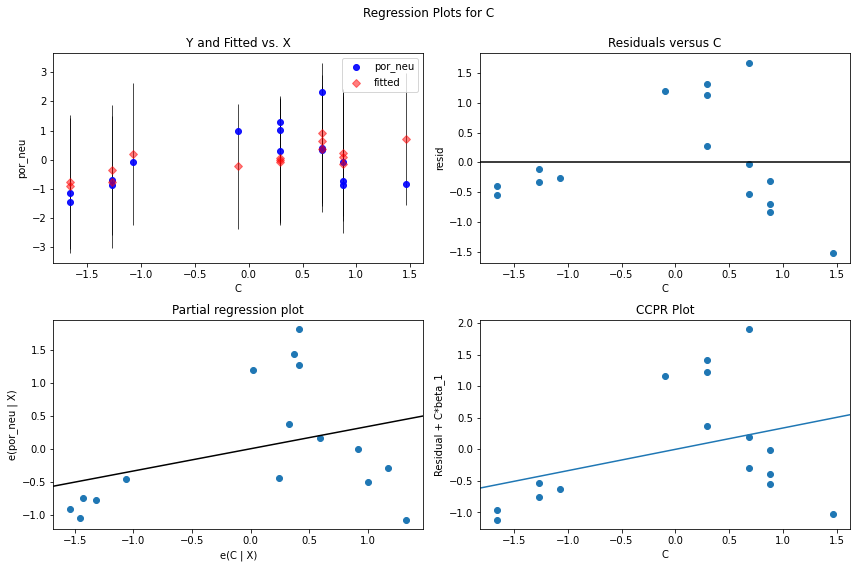

In [89]:
feature_cols = ['C', 'A']
X = df_scaled[feature_cols]
y = df_scaled['por_neu']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print('------------------------')
print('SKLEARN LINEARREGRESSION')
print('------------------------')
print()

print("Intercept : ", regressor.intercept_)
print("COEF: ", regressor.coef_)
print("Score: ", regressor.score(X_train, y_train))
print('Mean Absolute Error:', me.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', me.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(me.mean_squared_error(y_test, y_pred)))

print()
print('-----------------')
print('STATSMODELS OLS')
print('-----------------')

# print(me.SCORERS.keys())

X = sm.add_constant(X)
model1 = sm.OLS(y,X)

ols_cv = cross_val_score(regressor, X, y, cv=4)
print('R2: ', ols_cv)
ols_cv = cross_val_score(regressor, X, y, scoring='neg_mean_squared_error', cv=4)
print('NMSE: ', ols_cv)

result=model1.fit()

print(result.summary())

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(result, 'C', fig=fig)

In [138]:
target = pd.DataFrame(df[['por_pos', 'por_neu', 'por_neg']])

columns_features = ['O_Coded', 'C_Coded', 'E_Coded', 'A_Coded', 'N_Coded']
df_features = pd.DataFrame(df[columns_features])
# print(df_features)
# print(y)

targets = ['por_neg']

perform_linear_regression(combs, df_features, targets)

                            OLS Regression Results                            
Dep. Variable:                por_neg   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     6.984
Date:                Thu, 12 Aug 2021   Prob (F-statistic):             0.0193
Time:                        12:20:27   Log-Likelihood:                -45.273
No. Observations:                  16   AIC:                             94.55
Df Residuals:                      14   BIC:                             96.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5312     11.132     -0.138      0.8

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [200]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

# rng = np.random.RandomState(0)

feature_cols = ['C_Coded', 'E_Coded', 'A_Coded']
X = df[feature_cols]
y = df['por_pos']

sv = LinearRegression()

# regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
result = sv.fit(X, y)
print(sv.score(X,y))
print(sv.intercept_)
print(sv.coef_)


# cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)
cv = KFold(n_splits=5, random_state=42, shuffle=True)
cvs = cross_val_score(sv, X, y, scoring='r2', cv=cv)
print('R2: ', np.mean(cvs))

0.576319055953441
101.8311106625969
[-14.07628657   4.26080851  -4.5841492 ]
R2:  -0.6315913268088444


In [92]:
df

,id_user,pos,neu,neg,por_pos,por_neu,por_neg,mean,O,C,E,A,N,O_Coded,C_Coded,E_Coded,A_Coded,N_Coded
0,26,1408,1866,1764,27.947598,37.038507,35.013894,-0.022431,37,43,36,24,26,4,5,4,3,3
1,27,1367,1926,1255,30.057168,42.348285,27.594547,-0.000698,41,43,34,22,23,5,5,4,3,3
2,28,1968,2031,1933,33.175995,34.238031,32.585974,-0.007192,43,46,31,24,15,5,5,4,3,2
3,30,1719,832,620,54.210028,26.237780,19.552192,0.113446,17,33,33,22,39,2,4,4,3,4
4,31,2993,1443,1557,49.941599,24.078091,25.980310,0.055160,22,33,31,20,8,3,4,4,2,1
5,32,4386,2693,2306,46.734150,28.694726,24.571124,0.057806,39,49,39,28,15,4,5,4,3,2
6,34,693,459,393,44.854369,29.708738,25.436893,0.051225,35,35,32,26,16,4,4,4,3,2
7,35,895,975,725,34.489403,37.572254,27.938343,0.028354,29,45,34,35,29,3,5,4,4,3
8,37,3235,1892,1329,50.108426,29.306072,20.585502,0.066105,40,46,38,22,21,4,5,4,3,3
9,38,1646,1336,1726,34.961767,28.377230,36.661003,-0.017339,32,46,19,18,28,4,5,2,2,3


In [93]:
df_scaled

,por_pos,por_neu,por_neg,O,C,E,A,N,O_Coded,C_Coded,E_Coded,A_Coded,N_Coded
0,-0.946439,0.315281,1.448544,0.676419,0.29277,0.929890,-0.172629,0.222636,-0.097839,0.139297,0.095783,0.000000,0.000066
1,-0.738330,1.035239,-0.030029,1.269444,0.29277,0.548397,-0.597562,-0.145865,2.077731,0.139297,0.095783,0.000000,0.000066
2,-0.430657,-0.064438,0.964693,1.565956,0.87831,-0.023843,-0.172629,-1.128534,2.077731,0.139297,0.095783,0.000000,-1.109802
3,1.644351,-1.149200,-1.632759,-2.288706,-1.65903,0.357650,-0.597562,1.819474,-2.682448,-7.178880,0.095783,0.000000,3.899132
4,1.223270,-1.442034,-0.351724,-1.547424,-1.65903,-0.023843,-1.022494,-1.988370,-0.131357,-7.178880,0.095783,-11.612396,-50.143154
5,0.906855,-0.816060,-0.632556,0.972931,1.46385,1.502130,0.677236,-1.128534,-0.097839,0.139297,0.095783,0.000000,-1.109802
6,0.721415,-0.678569,-0.460020,0.379907,-1.26867,0.166903,0.252304,-1.005701,-0.097839,-7.178880,0.095783,0.000000,-1.109802
7,-0.301090,0.387653,0.038485,-0.509631,0.68313,0.548397,2.164501,0.591137,-0.131357,0.139297,0.095783,11.612396,0.000066
8,1.239728,-0.733167,-1.426835,1.121188,0.87831,1.311384,-0.597562,-0.391532,-0.097839,0.139297,0.095783,0.000000,0.000066
9,-0.254491,-0.859110,1.776790,-0.064862,0.87831,-2.312804,-1.447427,0.468303,-0.097839,0.139297,-146.351498,-11.612396,0.000066


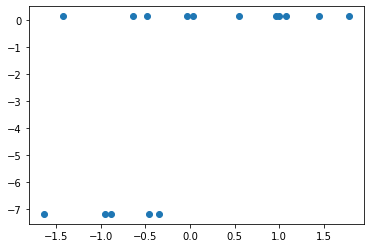

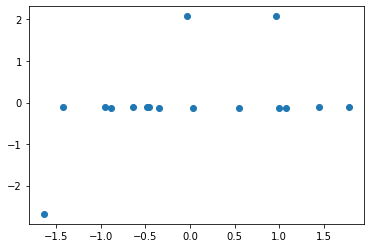

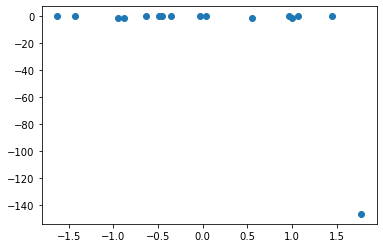

In [101]:
plt.scatter(df_scaled['por_neg'], df_scaled['C_Coded'])
plt.show()
plt.scatter(df_scaled['por_neg'], df_scaled['O_Coded'])
plt.show()
plt.scatter(df_scaled['por_neg'], df_scaled['E_Coded'])
plt.show()

In [256]:
combs = [] # lista que guarda a combinacao

tgt = []
features_list = ['O_Coded', 'C_Coded', 'E_Coded', 'A_Coded', 'N_Coded']
# features_list = ['O', 'C', 'E', 'A', 'N']

combinations(tgt, features_list)

def Sorting(lst):
    lst.sort(key=len)
    return lst

combs = Sorting(combs)

In [106]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

test_mse = []

for i in range(1,6):

    for c in combs:
        X = df_scaled[c]
        y = df_scaled['por_neg']
        print('COMBINATION: ', c)

        poly_reg = PolynomialFeatures(degree=i)
        X_poly = poly_reg.fit_transform(X)

        model = LinearRegression()
        model.fit(X_poly, y)

    #     cvs = cross_val_score(model, X_poly, y, scoring='r2', cv=5)
        y_poly_pred = model.predict(X_poly)
    #     print(np.mean(cvs))

        model = sm.OLS(y, sm.add_constant(X_poly)).fit()
        if model.f_pvalue <= 0.05:
    #         print(model.rsquared)
            print(model.summary())
            rmse = np.sqrt(me.mean_squared_error(y, y_poly_pred))
            test_mse.append(rmse)
            r2 = me.r2_score(y, y_poly_pred)
            print('RMSE: ', rmse)
            print('R2: ', r2)
            print('DEGREE: ', i)
    #         print('COEF: ', model.coef_)
    #         print('INTERCEPT: ', model.intercept_)
            print()
    #         print(model.score(X_poly, y))

    #         dfPoly = pd.DataFrame(
    #             data=X_poly, 
    #             columns=poly_reg.get_feature_names(X.columns))

    #         print(dfPoly)

print("Best fit polynomial degree: ", min(test_mse))

COMBINATION:  ['O_Coded']
COMBINATION:  ['C_Coded']
                            OLS Regression Results                            
Dep. Variable:                por_neg   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     6.984
Date:                Thu, 12 Aug 2021   Prob (F-statistic):             0.0193
Time:                        11:10:25   Log-Likelihood:                -19.465
No. Observations:                  16   AIC:                             42.93
Df Residuals:                      14   BIC:                             44.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/s

COMBINATION:  ['C_Coded', 'A_Coded']
COMBINATION:  ['C_Coded', 'N_Coded']
COMBINATION:  ['E_Coded', 'A_Coded']
COMBINATION:  ['E_Coded', 'N_Coded']
COMBINATION:  ['A_Coded', 'N_Coded']
COMBINATION:  ['O_Coded', 'C_Coded', 'E_Coded']
COMBINATION:  ['O_Coded', 'C_Coded', 'A_Coded']
COMBINATION:  ['O_Coded', 'C_Coded', 'N_Coded']
COMBINATION:  ['O_Coded', 'E_Coded', 'A_Coded']
COMBINATION:  ['O_Coded', 'E_Coded', 'N_Coded']
COMBINATION:  ['O_Coded', 'A_Coded', 'N_Coded']
COMBINATION:  ['C_Coded', 'E_Coded', 'A_Coded']
COMBINATION:  ['C_Coded', 'E_Coded', 'N_Coded']
COMBINATION:  ['C_Coded', 'A_Coded', 'N_Coded']
COMBINATION:  ['E_Coded', 'A_Coded', 'N_Coded']
COMBINATION:  ['O_Coded', 'C_Coded', 'E_Coded', 'A_Coded']
COMBINATION:  ['O_Coded', 'C_Coded', 'E_Coded', 'N_Coded']
COMBINATION:  ['O_Coded', 'C_Coded', 'A_Coded', 'N_Coded']
COMBINATION:  ['O_Coded', 'E_Coded', 'A_Coded', 'N_Coded']
COMBINATION:  ['C_Coded', 'E_Coded', 'A_Coded', 'N_Coded']
COMBINATION:  ['O_Coded', 'C_Coded', 'E_

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


COMBINATION:  ['C_Coded', 'E_Coded', 'A_Coded']
COMBINATION:  ['C_Coded', 'E_Coded', 'N_Coded']
COMBINATION:  ['C_Coded', 'A_Coded', 'N_Coded']
COMBINATION:  ['E_Coded', 'A_Coded', 'N_Coded']
COMBINATION:  ['O_Coded', 'C_Coded', 'E_Coded', 'A_Coded']
COMBINATION:  ['O_Coded', 'C_Coded', 'E_Coded', 'N_Coded']
COMBINATION:  ['O_Coded', 'C_Coded', 'A_Coded', 'N_Coded']
COMBINATION:  ['O_Coded', 'E_Coded', 'A_Coded', 'N_Coded']
COMBINATION:  ['C_Coded', 'E_Coded', 'A_Coded', 'N_Coded']
COMBINATION:  ['O_Coded', 'C_Coded', 'E_Coded', 'A_Coded', 'N_Coded']
COMBINATION:  ['O_Coded']
COMBINATION:  ['C_Coded']
                            OLS Regression Results                            
Dep. Variable:                por_neg   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     6.984
Date:                Thu, 12 Aug 2021   Prob (F-statistic):             0.0

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [370]:
import statsmodels.tools.eval_measures as em
# ---------------------------------------------------------
# MULTIPLE LINEAR REGRESSION
# ---------------------------------------------------------
# EXECUTION: 10 times with 10-fold cross-validation
# TRAIN: 0.7
# TEST: 0.3
# ---------------------------------------------------------

dep_var = 'por_neu'

res_json = {
    'dep_var': [],
    'ind_vars': [],
    'r2': [],
    'adj_r2': [],
    'rmse': [],
    'intercept':[],
    'coef':[],
    'coef_pvalues': []
}

for c in combs:
    X = df_scaled[c]
    y = df_scaled[dep_var]
#     print('COMBINATION: ', c)

    res_json['dep_var'].append(dep_var)
    res_json['ind_vars'].append(', '.join(c))
    
    scores = []
    scores_ols = []
    adj_r2 = []
    rmses = []
    coef_pvalues = []
    intercepts = []
    
    printed = False
    
#     for i in range(1,11):

#         kf = KFold(n_splits=10, random_state=42, shuffle=True)
    rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=42)

    for train_index, test_index in rkf.split(X):
#                 X_train, X_test, y_train, y_test = train_test_split(X, y, 
#                                                                     test_size=0.3, 
#                                                                     random_state=42,
#                                                                    shuffle=True)

            X_train, X_test = X.loc[train_index], X.loc[test_index]
            y_train, y_test = y.loc[train_index], y.loc[test_index]

            regressor = LinearRegression()
            regressor.fit(X_train, y_train)

            y_pred = regressor.predict(X_test)

#             rmse = np.sqrt(me.mean_squared_error(y_test, y_pred))

#                 adj_r2 = 1 - (1 - regressor.score(X_train, y_train)) * (len(y)-1)/(len(y)-X.shape[1]-1)
#             score = regressor.score(X_train, y_train)
#             print(score)
#             scores.append(score)
#             rmses.append(rmse)
#                 params = np.append(regressor.intercept_, regressor.coef_)

#                 MSE = me.mean_squared_error(y_test, y_pred)

#                 newX = np.append(np.ones((len(X),1)), X, axis=1)

#                 var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
#                 sd_b = np.sqrt(var_b)
#                 ts_b = params/ sd_b

#                 p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

#                 sd_b = np.round(sd_b,3)
#                 ts_b = np.round(ts_b,3)
#                 p_values = np.round(p_values,3)
#                 params = np.round(params,4)

#                 myDF3 = pd.DataFrame()
#                 myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,ts_b,p_values]
            X_train = sm.add_constant(X_train)
            m = sm.OLS(y_train, X_train).fit()
            predictions = m.predict(X_train)
            rmse = em.rmse(y_train, predictions)
            params = np.round(m.params,4)
            intercepts.append(params[0])
#             print('tudo ', params)
#             print('itc ', params[0])
#             print('coef ', params[1:])
            scores_ols.append(m.rsquared)
            adj_r2.append(m.rsquared_adj)
            rmses.append(rmse)
            coef_pvalues.append(np.round(m.pvalues, 4))
#             if printed == False and m.f_pvalue <= 0.05 and len(c) >= 2:
#                 print(m.summary())
#                 printed = True

#     print(c)
#     print(len(scores))
#     print(np.mean(scores))
#     print(len(scores_ols))
#     print(scores)
#     print(np.mean(scores_ols))
    res_json['r2'].append(np.mean(scores_ols))
    res_json['adj_r2'].append(np.mean(adj_r2))
    res_json['rmse'].append(np.mean(rmses))
    res_json['intercept'].append(np.round(np.mean(intercepts), 4))
    res_json['coef'].append(np.round(params[1:].values, 4))
    coef_pvalues_dict = {}
    for p in coef_pvalues:
        for idx, pv in enumerate(p):
            if idx not in coef_pvalues_dict:
                coef_pvalues_dict[idx] = []
            coef_pvalues_dict[idx].append(pv)
          
    coef_pvalues = []
    for cpd in coef_pvalues_dict:
        val = coef_pvalues_dict[cpd]
        coef_pvalues.append(np.round(np.mean(val), 4))
#         print(val)
        
    res_json['coef_pvalues'].append(coef_pvalues)

res_df = pd.DataFrame(res_json)
res_df.sort_values(by=['adj_r2'], ascending=False)

,dep_var,ind_vars,r2,adj_r2,rmse,intercept,coef,coef_pvalues
10,por_neu,"C_Coded, A_Coded",0.555116,0.476996,0.661263,0.2906,"[0.1404, 0.0685]","[0.267, 0.0538, 0.0425]"
21,por_neu,"C_Coded, E_Coded, A_Coded",0.577623,0.455697,0.644314,0.3313,"[0.1526, 0.0039, 0.059]","[0.2615, 0.0575, 0.5716, 0.1065]"
16,por_neu,"O_Coded, C_Coded, A_Coded",0.576254,0.453902,0.645613,0.2495,"[0.2796, 0.1109, 0.0715]","[0.3663, 0.5315, 0.1348, 0.0428]"
23,por_neu,"C_Coded, A_Coded, N_Coded",0.561908,0.435408,0.656576,0.2849,"[0.1391, 0.0678, 0.0013]","[0.2974, 0.0756, 0.0674, 0.8049]"
25,por_neu,"O_Coded, C_Coded, E_Coded, A_Coded",0.594942,0.422450,0.631076,0.2833,"[0.2641, 0.122, 0.003, 0.064]","[0.3771, 0.5896, 0.1469, 0.6521, 0.1049]"
27,por_neu,"O_Coded, C_Coded, A_Coded, N_Coded",0.589264,0.414312,0.636293,0.2352,"[0.2964, 0.1036, 0.0686, 0.0056]","[0.4193, 0.5131, 0.1862, 0.07, 0.7415]"
29,por_neu,"C_Coded, E_Coded, A_Coded, N_Coded",0.584697,0.407816,0.639295,0.3234,"[0.15, 0.0041, 0.0567, 0.0033]","[0.3007, 0.0775, 0.5985, 0.1572, 0.7774]"
30,por_neu,"O_Coded, C_Coded, E_Coded, A_Coded, N_Coded",0.608449,0.375193,0.621204,0.2628,"[0.2832, 0.1141, 0.0034, 0.0594, 0.0071]","[0.4388, 0.5664, 0.1928, 0.6552, 0.1556, 0.7283]"
7,por_neu,"O_Coded, A_Coded",0.455852,0.360297,0.731739,0.0038,"[0.4536, 0.0831]","[0.7804, 0.2045, 0.0246]"
20,por_neu,"O_Coded, A_Coded, N_Coded",0.489066,0.341523,0.709954,0.0242,"[0.4673, 0.0736, 0.0147]","[0.7605, 0.2014, 0.0615, 0.4651]"


In [246]:
# ---------------------------------------------------------
# MULTIPLE LINEAR REGRESSION WITH POLYNOMIAL FEATURES
# ---------------------------------------------------------
# EXECUTION: 10 times with 10-fold cross-validation
# TRAIN: 0.7
# TEST: 0.3
# DEGREE: 3
# ---------------------------------------------------------

dep_var = 'por_neu'

res_json = {
    'dep_var': [],
    'ind_vars': [],
    'r2': [],
    'adj_r2': [],
    'rmse': [],
    'intercept':[],
    'coef':[]    
}

for c in combs:
    X = df_scaled[c]
    y = df_scaled[dep_var]

    res_json['dep_var'].append(dep_var)
    res_json['ind_vars'].append(', '.join(c))
    
    scores = []
    rmses = []
    
    for i in range(1,11):

        kf = KFold(n_splits=10, random_state=1, shuffle=True)

        for train_index, test_index in kf.split(X):
            poly_reg = PolynomialFeatures(degree=3)
            X_poly = poly_reg.fit_transform(X)

            X_train, X_test, y_train, y_test = train_test_split(X_poly, y, 
                                                                test_size=0.3, 
                                                                random_state=42,
                                                               shuffle=True)

            regressor = LinearRegression()
            regressor.fit(X_train, y_train)

            y_pred = regressor.predict(X_test)

            rmse = np.sqrt(me.mean_squared_error(y_test, y_pred))

            adj_r2 = 1 - (1 - regressor.score(X_train, y_train)) * (len(y)-1)/(len(y)-X.shape[1]-1)

            scores.append(regressor.score(X_train, y_train))
            rmses.append(rmse)

            MSE = me.mean_squared_error(y_test, y_pred)        

    res_json['r2'].append(np.mean(scores))
    res_json['adj_r2'].append(adj_r2)
    res_json['rmse'].append(np.mean(rmses))
    res_json['intercept'].append(regressor.intercept_)
    res_json['coef'].append(regressor.coef_)

res_df = pd.DataFrame(res_json)
res_df.sort_values(by=['adj_r2'], ascending=False)

,dep_var,ind_vars,r2,adj_r2,rmse,intercept,coef
30,por_neu,"O_Coded, C_Coded, E_Coded, A_Coded, N_Coded",1.000000,1.000000,0.876232,-0.685830,"[2.2008542551073523e-12, -0.003230195292448545..."
29,por_neu,"C_Coded, E_Coded, A_Coded, N_Coded",1.000000,1.000000,1.247570,-0.685093,"[-9.608777152853715e-12, -6.741583002628527e-0..."
28,por_neu,"O_Coded, E_Coded, A_Coded, N_Coded",1.000000,1.000000,0.781792,-0.685871,"[2.404511014126101e-11, -0.0031950245197206483..."
27,por_neu,"O_Coded, C_Coded, A_Coded, N_Coded",1.000000,1.000000,9.736881,-5.535837,"[7.519205457925948e-10, -46.861104545068635, -..."
26,por_neu,"O_Coded, C_Coded, E_Coded, N_Coded",1.000000,1.000000,10.812739,-3.865959,"[4.6925219828722244e-08, -30.58125793502671, -..."
25,por_neu,"O_Coded, C_Coded, E_Coded, A_Coded",1.000000,1.000000,0.847527,-0.685188,"[1.0446983772852136e-11, 0.0035754894563064005..."
20,por_neu,"O_Coded, A_Coded, N_Coded",1.000000,1.000000,11.230473,-5.540812,"[-9.990492374351012e-10, -47.87534378361974, 2..."
18,por_neu,"O_Coded, E_Coded, A_Coded",0.999875,0.999844,0.834448,-0.658584,"[-1.2301316866178413e-11, 0.003943922988384266..."
16,por_neu,"O_Coded, C_Coded, A_Coded",0.985824,0.982280,0.749104,-5.529341,"[7.689482731110253e-13, -46.72328546366716, -6..."
17,por_neu,"O_Coded, C_Coded, N_Coded",0.985174,0.981468,13.156907,-4.956470,"[-5.5203183387322885e-11, -40.59624078975309, ..."


In [269]:
df_scaled.rcorr(method='spearman', stars=False)

,por_pos,por_neu,por_neg,O,C,E,A,N,O_Coded,C_Coded,E_Coded,A_Coded,N_Coded
por_pos,-,0.000,0.006,0.646,0.357,0.627,0.217,0.601,0.527,0.009,0.593,0.151,0.85
por_neu,-0.897,-,0.137,0.458,0.325,0.824,0.061,0.589,0.438,0.009,0.921,0.010,0.756
por_neg,-0.653,0.388,-,0.922,0.249,0.655,0.793,0.589,0.687,0.021,0.481,0.459,0.863
O,-0.124,0.2,0.027,-,0.014,0.265,0.61,0.032,0.000,0.099,0.341,0.651,0.118
C,-0.247,0.263,0.306,0.602,-,0.193,0.316,0.443,0.047,0.000,0.674,0.507,0.507
E,0.131,0.061,-0.121,0.296,0.343,-,0.18,0.512,0.608,0.201,0.000,0.339,0.642
A,-0.326,0.478,-0.071,0.138,0.268,0.353,-,0.534,0.553,0.512,0.176,0.000,0.489
N,-0.142,0.146,0.146,-0.538,-0.206,-0.177,-0.168,-,0.009,0.871,0.141,0.903,0.000
O_Coded,-0.171,0.209,0.109,0.937,0.503,0.139,0.16,-0.63,-,0.212,0.505,0.567,0.039
C_Coded,-0.629,0.629,0.57,0.427,0.813,0.338,0.177,0.044,0.33,-,0.741,0.413,1.
